# XGBoost
### Imports

In [3]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

### Create Dataframe

In [4]:
data = pd.read_csv('data/selected_features.csv')
X_train, X_test, y_train, y_test = train_test_split(data.drop('price actual', axis=1), data['price actual'], test_size=0.2, random_state=42)

### Hyperparameter Tuning

In [5]:
# XGBoost setup and grid search
cv_split = TimeSeriesSplit(n_splits=4, test_size=100)
model = xgb.XGBRegressor()

parameters = {
    "max_depth": [10, 12, 15],
    "learning_rate": [0.02, 0.05, 0.1, 0.2],
    "n_estimators": [700, 1000, 2500],
    "colsample_bytree": [0.5, 0.7, 0.85]
}

grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Extract parameter combinations and corresponding MSE values
param_combinations = grid_search.cv_results_['params']
mse_values = grid_search.cv_results_['mean_test_score']

# Extract parameter values for scatter plots
max_depth_values = [params['max_depth'] for params in param_combinations]
learning_rate_values = [params['learning_rate'] for params in param_combinations]
n_estimators_values = [params['n_estimators'] for params in param_combinations]
colsample_bytree_values = [params['colsample_bytree'] for params in param_combinations]

# Scatter plot for Max Depth vs. MSE
plt.figure(figsize=(8, 6))
plt.scatter(max_depth_values, mse_values)
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Max Depth vs. MSE')
plt.grid(True)
plt.show()

# Scatter plot for Learning Rate vs. MSE
plt.figure(figsize=(8, 6))
plt.scatter(learning_rate_values, mse_values)
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Learning Rate vs. MSE')
plt.grid(True)
plt.show()

# Scatter plot for Number of Estimators vs. MSE
plt.figure(figsize=(8, 6))
plt.scatter(n_estimators_values, mse_values)
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Number of Estimators vs. MSE')
plt.grid(True)
plt.show()

# Scatter plot for ColSample by tree vs. MSE
plt.figure(figsize=(8, 6))
plt.scatter(colsample_bytree_values, mse_values)
plt.xlabel('ColSample by tree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('ColSample by tree vs. MSE')
plt.grid(True)
plt.show()


KeyboardInterrupt: 

In [6]:
# Get the best parameters and best MSE
best_params = grid_search.best_params_
best_mse = grid_search.best_score_

print("Best Parameters:")
print(best_params)
print(f"Best Mean Squared Error (MSE): {best_mse}")

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

 n### XGB

In [7]:
reg = xgb.XGBRegressor(n_estimators=600)
reg.fit(X_train, y_train, verbose = False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=600, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

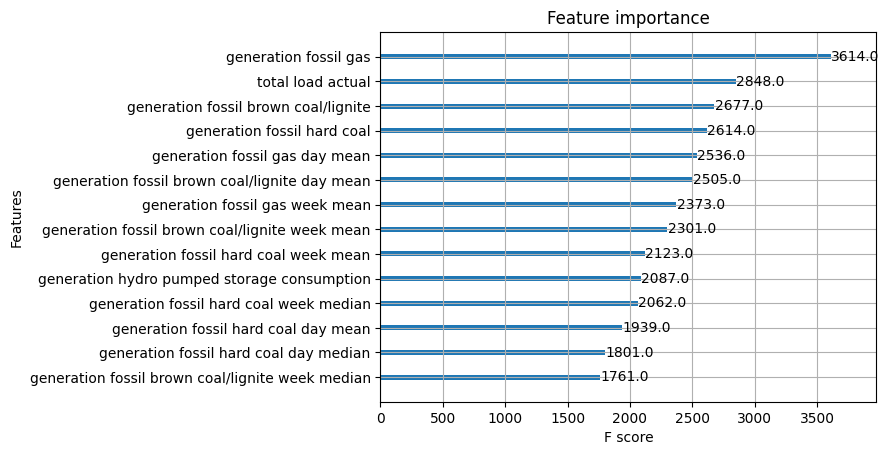

In [8]:
xgb.plot_importance(reg)

NameError: name 'y_pred' is not defined

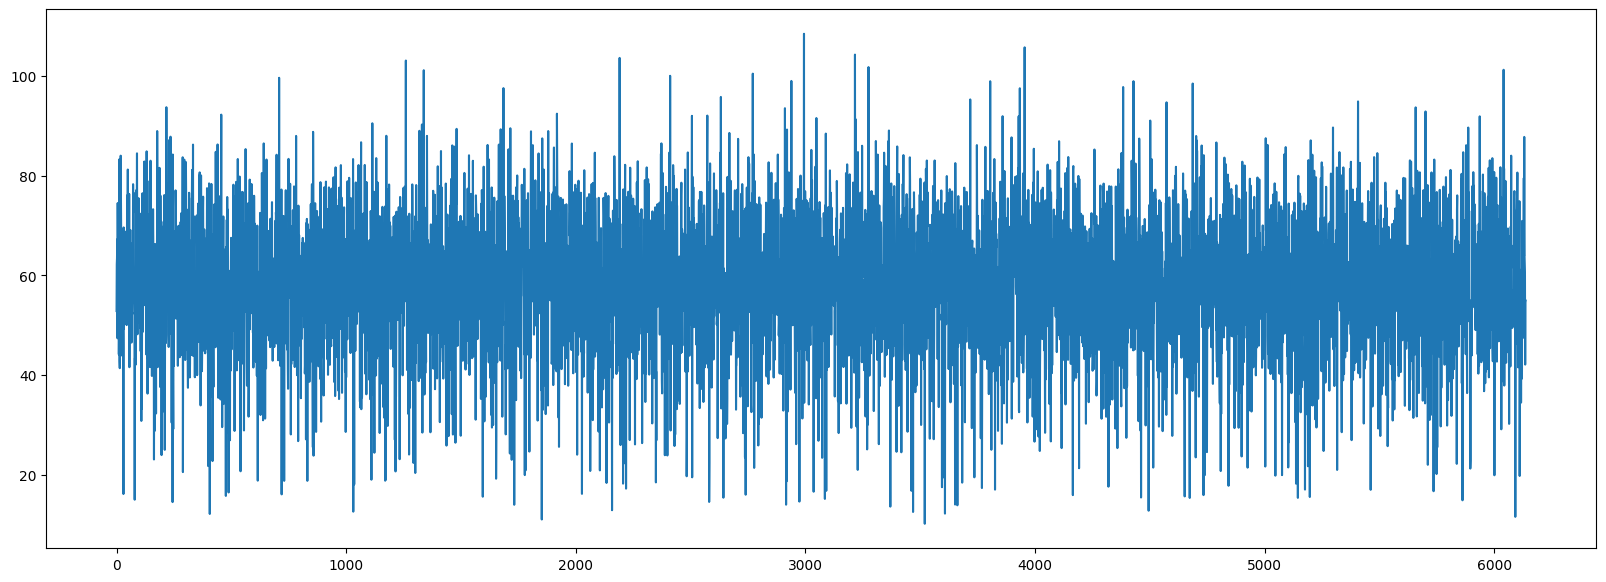

In [9]:
plt.figure(figsize=(20, 7))
plt.plot(y_test.reset_index(drop=True), label='Actual Values')
plt.plot(y_pred, label='Predicted Values', linestyle='dashed')
plt.xlabel('Time (Hours)')
plt.ylabel('Price')
plt.title('Comparison over Time (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()

### Test Model on OG Data

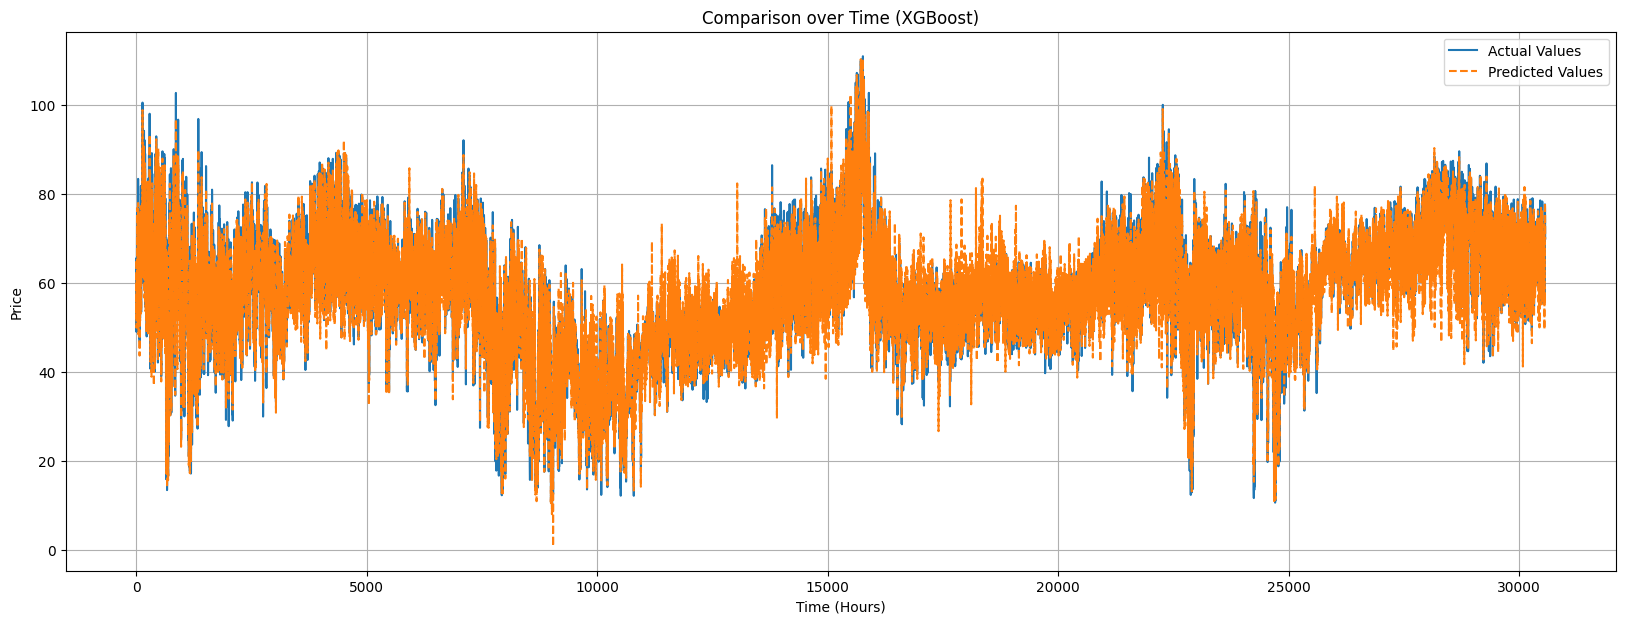

In [ ]:
y_pred_total = reg.predict(data.drop('price actual', axis=1))

plt.figure(figsize=(20, 7))
plt.plot(data['price actual'], label='Actual Values')
plt.plot(y_pred_total, label='Predicted Values', linestyle='dashed')
plt.xlabel('Time (Hours)')
plt.ylabel('Price')
plt.title('Comparison over Time (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()

### Save to CSV

In [ ]:
xgb = pd.DataFrame(y_pred)
xgb.to_csv('data/xgb.csv', index=False, header=False)